In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import random
import pylab
from scipy import optimize


In [6]:
df = pd.read_csv('df_3.csv')
pace_per_k = df['pace_per_k']
pace_per_k2 = pace_per_k[~np.isnan(pace_per_k)]
df.head()

,Unnamed: 0,user_id,race_period,race_course,user_2439,user_2456,user_2458,user_2465,user_2466,user_2468,user_2469,user_2473,user_2508,seconds,pace_per_k,pace_time,FP_5K,Wisco_8K,Brown_8K,VCP_8K_Heps,FP_10K,VCP_8K_IC4A,REM_2nd_Night_Before_x,REM_Weighted_2_Days,REM_Weighted_3_Days,REM_Weighted_4_Days,REM_Expo_Weighted_2_Days,total_sleep_weighted_3days,cycles_count_2nd_Night_Before,cycles_count_weighted_3days,cycles_count_weighted_4days,total_sleep_weighted_2days,total_sleep_weighted_4days,total_sleep_weighted_5days,total_sleep_weighted_6days,REM_Expo_Weighted_3days,REM_Expo_Weighted_4days,REM_Night_Before,total_sleep_Night_Before,cycles_count_Night_Before,total_sleep_2nd_Night_Before,cycles_count_weighted_2days,HRV_Night_Before,HRV_2nd_Night_Before,HRV_weighted_2days,HRV_weighted_3days,HRV_weighted_4days,HRV_Expo_weighted_2days,HRV_Expo_weighted_3days,HRV_Expo_weighted_4days,...,total_sleep_expo_weighted_4days,cycles_count_expo_weighted_2days,cycles_count_expo_weighted_3days,cycles_count_expo_weighted_4days,light_sleep_Night_Before,light_sleep_2nd_Night_Before,light_sleep_weighted_2days,light_sleep_weighted_3days,light_sleep_weighted_4days,light_sleep_expo_weighted_2days,light_sleep_expo_weighted_3days,light_sleep_expo_weighted_4days,slow_wave_sleep_Night_Before,slow_wave_sleep_2nd_Night_Before,slow_wave_sleep_weighted_2days,slow_wave_sleep_weighted_3days,slow_wave_sleep_weighted_4days,slow_wave_sleep_expo_weighted_2days,slow_wave_sleep_expo_weighted_3days,slow_wave_sleep_expo_weighted_4days,latency_Night_Before,latency_2nd_Night_Before,latency_weighted_2days,latency_weighted_3days,latency_weighted_4days,latency_expo_weighted_2days,latency_expo_weighted_3days,latency_expo_weighted_4days,time_in_bed_Night_Before,time_in_bed_2nd_Night_Before,time_in_bed_weighted_2days,time_in_bed_weighted_3days,time_in_bed_weighted_4days,time_in_bed_expo_weighted_2days,time_in_bed_expo_weighted_3days,time_in_bed_expo_weighted_4days,resting_heart_rate_Night_Before,resting_heart_rate_2nd_Night_Before,resting_heart_rate_weighted_2days,resting_heart_rate_weighted_3days,resting_heart_rate_weighted_4days,resting_heart_rate_expo_weighted_2days,resting_heart_rate_expo_weighted_3days,resting_heart_rate_expo_weighted_4days,stress_during_week,schoolwork_hours_during_week,stress_during_week_2,REM_2nd_Night_Before_mean,REM_2nd_Night_Before_std,REM_2nd_Night_Before
0,0,828,1,FP_8K,0,0,0,0,0,0,0,0,0,1529.2,191.1500,03:11.1,0,0,0,0,0,0,88.5,78.00,78.95,83.366667,89.4,516.90,10,7.7,7.666667,514.166667,515.766667,510.428571,489.339286,83.052632,106.500000,67.0,513.0,5,515.5,7.500000,0.015313,0.076798,0.046821,0.051769,0.054194,0.079553,0.071837,0.066279,...,509.038462,10.0,8.578947,7.507692,372.0,369.0,371.666667,374.70,368.733333,373.2,385.894737,336.507692,74.0,58.0,64.500000,63.25,63.666667,52.6,58.236842,66.030769,33.001600,19.015500,25.258508,23.559878,23.005258,16.315350,16.883787,20.434728,652,571.41265,612.367714,609.457927,606.855798,573.79365,596.428982,592.879825,43,46,44.666667,44.7,44.733333,46.6,44.894737,44.938462,NaN,NaN,NaN,71.134146,57.678252,0.301081
1,1,828,2,Brown_8K,0,0,0,0,0,0,0,0,0,1552.3,194.0375,03:14.0,0,0,1,0,0,0,20.5,33.00,40.95,48.966667,12.4,493.20,2,4.1,4.400000,491.083333,494.333333,494.900000,492.692308,70.000000,88.069231,50.0,483.5,6,504.0,4.000000,0.020812,0.048415,0.044223,0.049020,0.050763,0.083007,0.067167,0.058537,...,500.007692,2.0,4.368421,5.876923,281.5,422.0,352.583333,351.60,347.900000,425.0,351.578947,330.984615,152.0,61.5,105.500000,100.65,97.466667,57.0,80.210526,80.953846,32.513800,19.007333,25.010275,23.509522,22.041954,16.306283,17.585499,14.642513,629,625.87395,621.381475,615.115740,607.889343,604.07415,591.938124,572.155878,45,47,47.333333,47.5,47.200000,51.8,48.105263,45.569231,4,14,5.0,71.134146,57.678252,-0.877872
2,2,828,3,VCP_8K_Heps,0,0,0,0,0,0,0,0,0,1582.5,197.8125,03:17.8,0,0,0,1,0,0,10.0,21.75,23.15,22.600000,8.2,465.55,2,3.0,2.933333,462.250000,470.300000,472.675000,474.000000,27.763158,18.930769,34.5

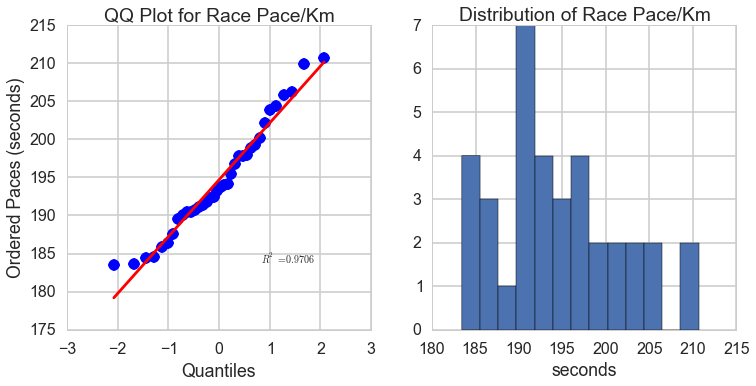

In [3]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(221)
stats.probplot(pace_per_k2, dist="norm", plot=ax)
ax.set_title("QQ Plot for Race Pace/Km")
ax.set_ylabel("Ordered Paces (seconds)")

ax2 = fig.add_subplot(222)
ax2.hist(pace_per_k2, 13)
ax2.set_title("Distribution of Race Pace/Km")
ax2.set_xlabel("seconds")


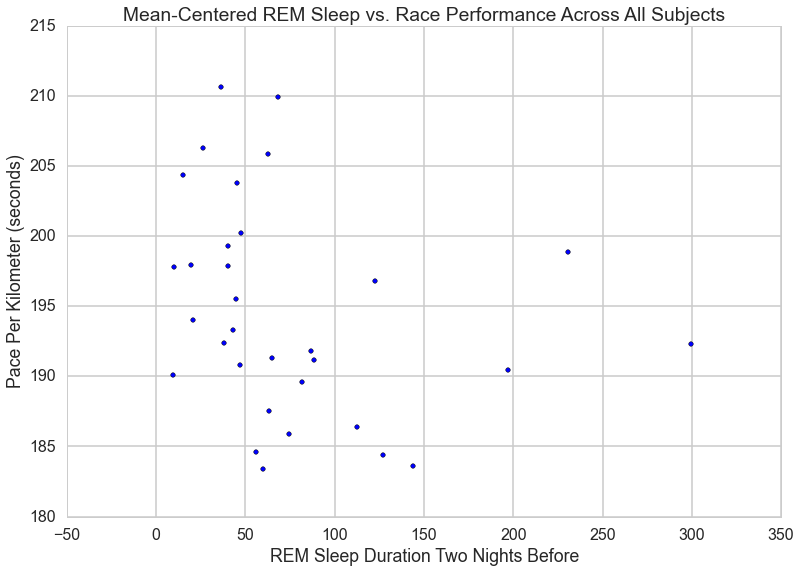

In [12]:
plt.scatter(df['REM_2nd_Night_Before_x'], df['pace_per_k'])
plt.title('Mean-Centered REM Sleep vs. Race Performance Across All Subjects')
plt.ylabel('Pace Per Kilometer (seconds)')
plt.xlabel('REM Sleep Duration Two Nights Before')

In [18]:
ben = df[df['user_id']==2456]
brandon = df[df['user_id']==2468]
austin = df[df['user_id']==2465]

In [37]:
def trendline(xd, yd, order=1, c='r', alpha=1, Rval=False):
    """Make a line of best fit"""

    #Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    if order == 2: power = coeffs[0]
    else: power = 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    #Plot trendline
    plt.plot(xl, yl, c, alpha=alpha)

    #Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

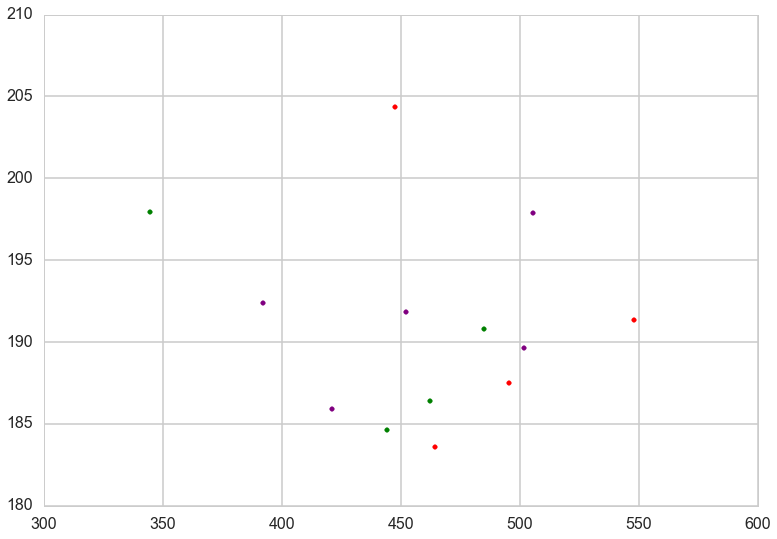

In [41]:
plt.scatter(brandon['total_sleep_2nd_Night_Before'], brandon['pace_per_k'], color = 'r')
plt.scatter(austin['total_sleep_2nd_Night_Before'], austin['pace_per_k'], color = 'purple')
plt.scatter(ben['total_sleep_2nd_Night_Before'], ben['pace_per_k'], color = 'green')

In [44]:
df[['REM_2nd_Night_Before_x', 'user_id', 'pace_per_k']]

,REM_2nd_Night_Before_x,user_id,pace_per_k
0,88.5,828,191.1500
1,20.5,828,194.0375
2,10.0,828,197.8125
3,43.0,828,193.2700
4,NaN,828,202.2000
5,112.5,2456,186.3625
6,56.0,2456,184.6000
7,19.5,2456,197.9625
8,47.0,2456,190.7700
9,NaN,2456,193.7750


In [61]:
np.linspace(0,160, num=100)

array([   0.        ,    1.61616162,    3.23232323,    4.84848485,
          6.46464646,    8.08080808,    9.6969697 ,   11.31313131,
         12.92929293,   14.54545455,   16.16161616,   17.77777778,
         19.39393939,   21.01010101,   22.62626263,   24.24242424,
         25.85858586,   27.47474747,   29.09090909,   30.70707071,
         32.32323232,   33.93939394,   35.55555556,   37.17171717,
         38.78787879,   40.4040404 ,   42.02020202,   43.63636364,
         45.25252525,   46.86868687,   48.48484848,   50.1010101 ,
         51.71717172,   53.33333333,   54.94949495,   56.56565657,
         58.18181818,   59.7979798 ,   61.41414141,   63.03030303,
         64.64646465,   66.26262626,   67.87878788,   69.49494949,
         71.11111111,   72.72727273,   74.34343434,   75.95959596,
         77.57575758,   79.19191919,   80.80808081,   82.42424242,
         84.04040404,   85.65656566,   87.27272727,   88.88888889,
         90.50505051,   92.12121212,   93.73737374,   95.35353

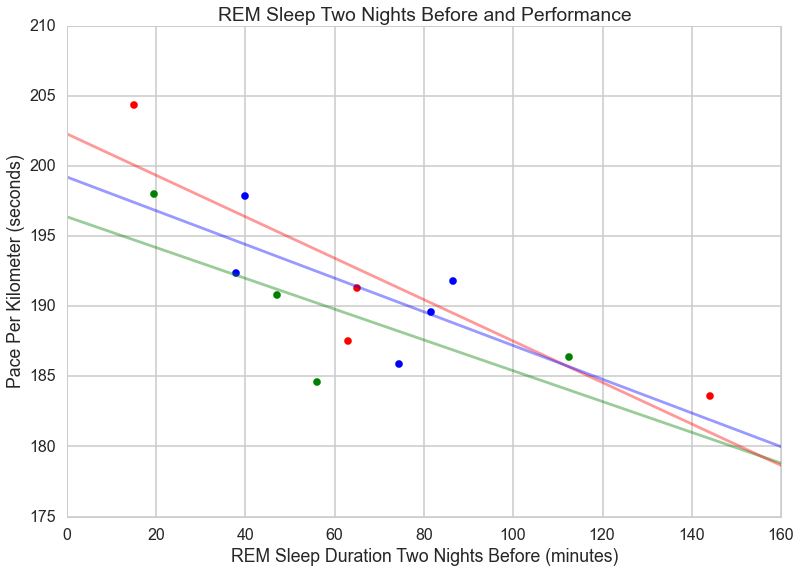

In [81]:
xben = [112.5, 56.0, 19.5, 47.0]
yben = [186.3625, 184.6, 197.9625, 190.770]
xbrandon =[144, 63, 15,65]
ybrandon = [183.5750, 187.5125, 204.3375, 191.3100]
xaustin = [74.5, 81.5, 38.0, 86.5, 40.0]
yaustin = [185.8750, 189.60, 192.3750, 191.80, 197.8750]


#plt.scatter(gabe[~np.isnan(gabe['REM_2nd_Night_Before_x'])), gabe['pace_per_k'])
plt.scatter(brandon['REM_2nd_Night_Before_x'], brandon['pace_per_k'], color = 'r', s=50)
plt.scatter(austin['REM_2nd_Night_Before_x'], austin['pace_per_k'], color = 'blue', s=50)
plt.scatter(ben['REM_2nd_Night_Before_x'], ben['pace_per_k'], color = 'green', s=50)


parben = np.polyfit(xben, yben, 1, full=True)
slopeben = parben[0][0]
intben = parben[0][1]
xl = np.linspace(0,160, num=100)
yl = [slopeben*xx + intben for xx in xl]

plt.plot(xl, yl, color='green', alpha=0.4)

parbrandon = np.polyfit(xbrandon, ybrandon, 1, full=True)
slopebrandon = parbrandon[0][0]
intbrandon = parbrandon[0][1]
xl2 = np.linspace(0,160, num=100)
yl2 = [slopebrandon*xx + intbrandon for xx in xl]
plt.plot(xl2, yl2, color='r', alpha=0.4)

paraustin = np.polyfit(xaustin, yaustin, 1, full=True)
slopeaustin = paraustin[0][0]
intaustin = paraustin[0][1]
xl3 = np.linspace(0,160, num=100)
yl3 = [slopeaustin*xx + intaustin for xx in xl]

plt.plot(xl3, yl3, color='blue', alpha=0.4)

plt.xlim(0, 160)

plt.xlabel('REM Sleep Duration Two Nights Before (minutes)')
plt.ylabel('Pace Per Kilometer (seconds)')
plt.title('REM Sleep Two Nights Before and Performance')

In [30]:
plt.scatter(df[''])

<function count>

In [82]:
sleeps2 = pd.read_csv('sleeps_temp_2.csv')
sleeps2 = sleeps2[['user_id', 'date_md', 'time_in_bed', 'latency', 'light_sleep_duration', 'slow_wave_sleep_duration',
                  'rem_sleep_duration', 'resting_heart_rate', 'hrv_rmssd', 'cycles_count']]
sleeps2['sleep_duration'] = sleeps2['light_sleep_duration'] + sleeps2['rem_sleep_duration'] + sleeps2['slow_wave_sleep_duration']
#Convert Units
sleeps2['time_in_bed'] = sleeps2['time_in_bed'].divide(60000.0)
sleeps2['light_sleep_duration'] = sleeps2['light_sleep_duration'].divide(60000.0)
sleeps2['slow_wave_sleep_duration'] = sleeps2['slow_wave_sleep_duration'].divide(60000.0)
sleeps2['rem_sleep_duration'] = sleeps2['rem_sleep_duration'].divide(60000.0)
sleeps2['sleep_duration'] = sleeps2['sleep_duration'].divide(60000.0)
sleeps2['latency'] = sleeps2['latency'].divide(60000.0)

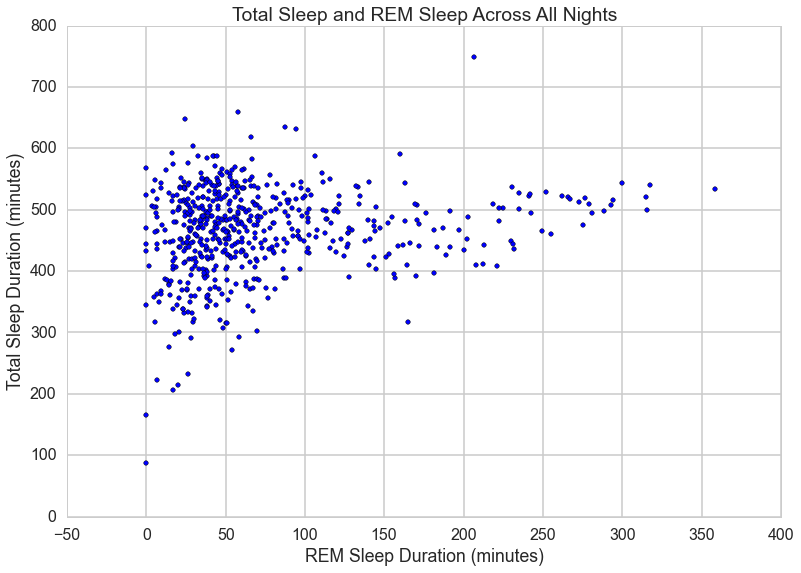

In [83]:
plt.scatter(sleeps2['rem_sleep_duration'], sleeps2['sleep_duration'])
plt.title('Total Sleep and REM Sleep Across All Nights')
plt.xlabel('REM Sleep Duration (minutes)')
plt.ylabel('Total Sleep Duration (minutes)')

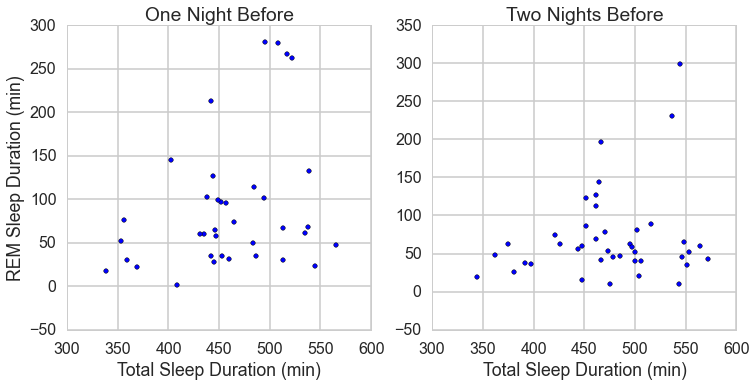

In [93]:
df = pd.read_csv('df_3.csv')


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(221)
ax.scatter(df['total_sleep_Night_Before'], df['REM_Night_Before'])
ax.set_title('One Night Before')
ax.set_ylabel('REM Sleep Duration (min)')
ax.set_xlabel('Total Sleep Duration (min)')

ax = fig.add_subplot(222)
ax.scatter(df['total_sleep_2nd_Night_Before'], df['REM_2nd_Night_Before_x'])
ax.set_title('Two Nights Before')
ax.set_xlabel('Total Sleep Duration (min)')